In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [10]:
train = pd.read_csv("dataset/dataset_redu/train_redu.csv")

test = pd.read_csv("dataset/dataset_redu/test_redu.csv")

In [11]:
train.head()

,label,intensidade,simetria
0,5,13.768007,17.831132
1,0,15.553721,20.588235
2,4,9.725390,14.729892
3,1,8.570928,14.772909
4,9,11.611645,14.321729


In [12]:
test.head()

,label,intensidade,simetria
0,7,9.230692,12.825130
1,2,14.430772,17.176871
2,1,4.937475,8.064226
3,0,18.514406,11.707683
4,4,9.622349,12.360944


In [13]:
# Filtrar apenas as instâncias com labels 1 ou 5
train1x5 = train[train['label'].isin([1, 5])]
test1x5 = test[test['label'].isin([1, 5])]

In [14]:
# caso queira salvar os dataframes filtrados

#train1x5.to_csv('train1x5.csv', index=False)
#test1x5.to_csv('test1x5.csv', index=False)

In [15]:
train1x5.head()

,label,intensidade,simetria
0,5,13.768007,17.831132
3,1,8.570928,14.772909
6,1,8.826531,8.123249
8,1,5.439176,4.963986
11,5,7.127851,12.048820


In [16]:
test1x5.head()

,label,intensidade,simetria
2,1,4.937475,8.064226
5,1,6.930272,10.462185
8,5,15.373149,17.944178
14,1,8.102741,4.659864
15,5,10.913365,13.678471


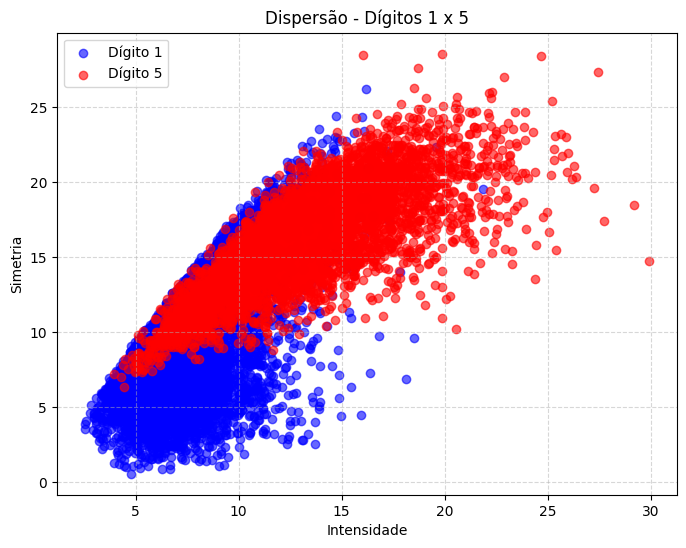

In [17]:
# Plotar os pontos
plt.figure(figsize=(8,6))

# Classe 1 
classe1 = train1x5[train1x5['label'] == 1]
plt.scatter(classe1['intensidade'], classe1['simetria'],
            color='blue', label='Dígito 1', alpha=0.6)

# Classe 5 
classe5 = train1x5[train1x5['label'] == 5]
plt.scatter(classe5['intensidade'], classe5['simetria'],
            color='red', label='Dígito 5', alpha=0.6)


plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Dispersão - Dígitos 1 x 5')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

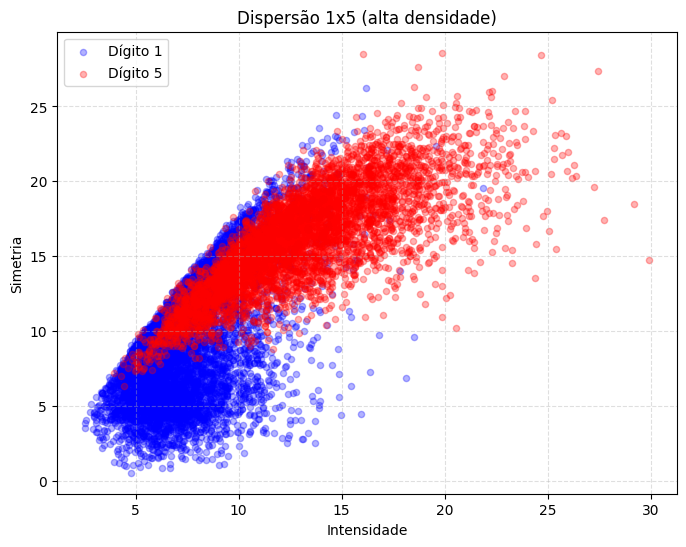

In [22]:
plt.figure(figsize=(8,6))

# Plotar dígito 1 (azul)
classe1 = train1x5[train1x5['label'] == 1]
plt.scatter(classe1['intensidade'], classe1['simetria'], 
            color='blue', label='Dígito 1', alpha=0.3, s=20)

# Plotar dígito 5 (vermelho)
classe5 = train1x5[train1x5['label'] == 5]
plt.scatter(classe5['intensidade'], classe5['simetria'], 
            color='red', label='Dígito 5', alpha=0.3, s=20)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Dispersão 1x5 (alta densidade)')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


=== Perceptron ===
[[821 314]
 [ 65 827]]
              precision    recall  f1-score   support

           1       0.93      0.72      0.81      1135
           5       0.72      0.93      0.81       892

    accuracy                           0.81      2027
   macro avg       0.83      0.83      0.81      2027
weighted avg       0.84      0.81      0.81      2027



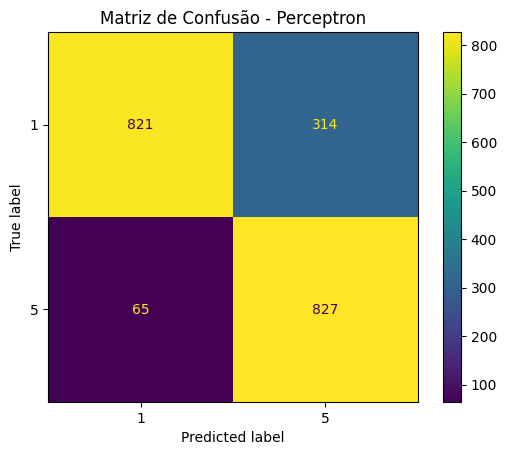

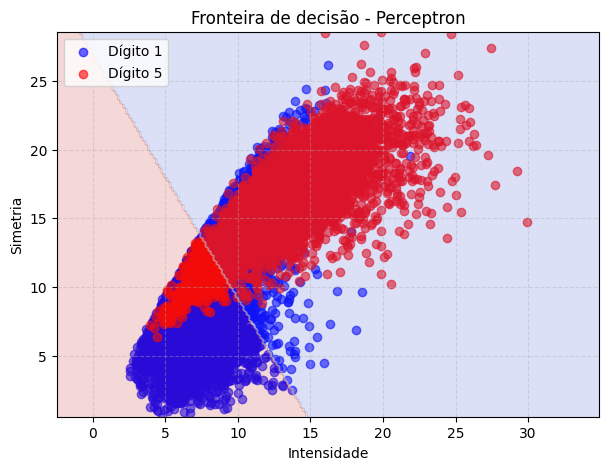


=== Logistic Regression ===
[[994 141]
 [158 734]]
              precision    recall  f1-score   support

           1       0.86      0.88      0.87      1135
           5       0.84      0.82      0.83       892

    accuracy                           0.85      2027
   macro avg       0.85      0.85      0.85      2027
weighted avg       0.85      0.85      0.85      2027



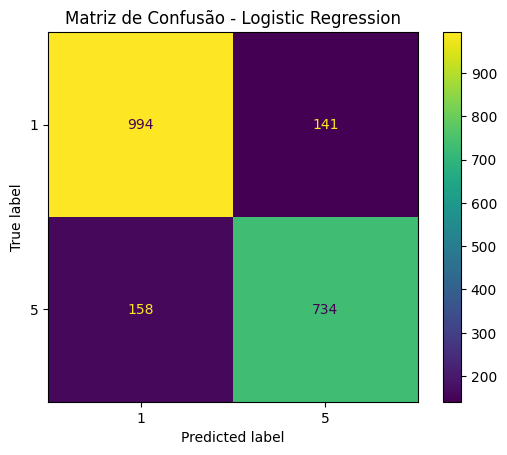

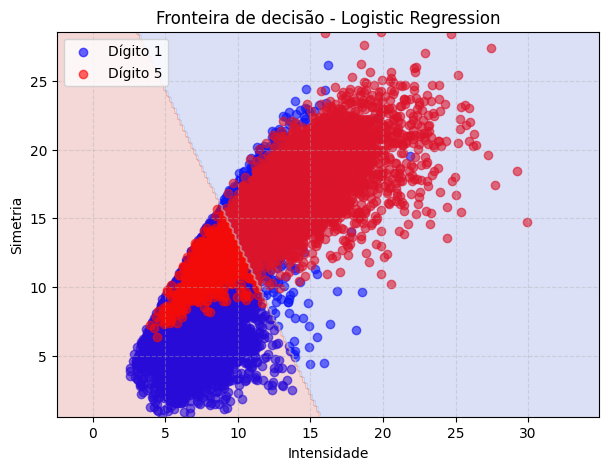


=== SVM Linear ===
[[996 139]
 [162 730]]
              precision    recall  f1-score   support

           1       0.86      0.88      0.87      1135
           5       0.84      0.82      0.83       892

    accuracy                           0.85      2027
   macro avg       0.85      0.85      0.85      2027
weighted avg       0.85      0.85      0.85      2027



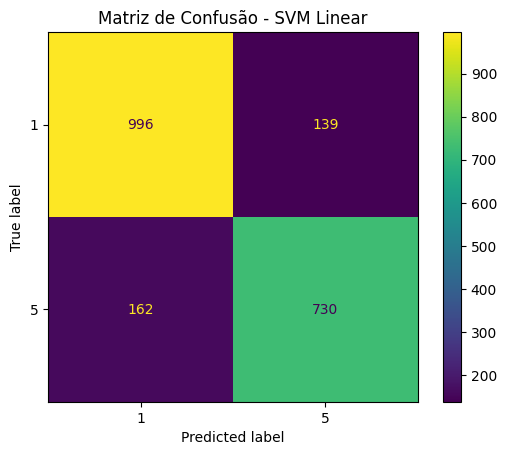

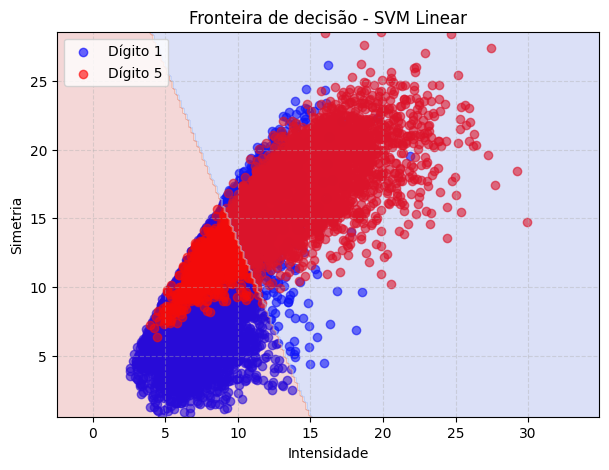

In [20]:
# 2. Criar vetores X e y para treino
X_train = train1x5[['intensidade', 'simetria']].values
y_train = np.where(train1x5['label'] == 1, 1, -1)  # +1 para 1, -1 para 5

# 3. Vetores para teste
X_test = test1x5[['intensidade', 'simetria']].values
y_test_labels = test1x5['label'].values
y_test = np.where(y_test_labels == 1, 1, -1)

# 4. Definir classificadores
classifiers = {
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3),
    "Logistic Regression": LogisticRegression(),
    "SVM Linear": SVC(kernel='linear')
}

# 5. Função para plotar a reta de decisão
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(7,5))
    
    # Plotar dados
    plt.scatter(X[y==1,0], X[y==1,1], color="blue", label="Dígito 1", alpha=0.6)
    plt.scatter(X[y==-1,0], X[y==-1,1], color="red", label="Dígito 5", alpha=0.6)
    
    # Criar malha para fronteira
    x_min, x_max = X[:,0].min()-5, X[:,0].max()+5
    y_min, y_max = X[:,1].min()-0.01, X[:,1].max()+0.01
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([1 if z==1 else -1 for z in Z])  # garantir -1/+1
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
    plt.xlabel("Intensidade")
    plt.ylabel("Simetria")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()

# 6. Treinar, avaliar e plotar
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Converter de {+1, -1} para {1, 5}
    y_pred_labels = np.where(y_pred == 1, 1, 5)
    
    # Métricas
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test_labels, y_pred_labels))
    print(classification_report(y_test_labels, y_pred_labels))
    
    # Mostrar matriz de confusão
    ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels)
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()
    
    # Plotar fronteira de decisão
    plot_decision_boundary(clf, X_train, y_train, f"Fronteira de decisão - {name}")